In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
sns.set()


In [2]:
# Cargar el dataset desde un archivo CSV o Excel
df = pd.read_excel('madurez.xlsx')  # O usa 'madurez_colores.csv'


In [3]:
print(df.head())

   madurez         R         G         B
0        1  0.070588  0.109804  0.101961
1        1  0.078431  0.109804  0.101961
2        1  0.074510  0.105882  0.098039
3        1  0.082353  0.105882  0.101961
4        2  0.082353  0.113725  0.113725


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14722 entries, 0 to 14721
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   madurez  14722 non-null  int64  
 1   R        14710 non-null  float64
 2   G        14710 non-null  float64
 3   B        14710 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 460.2 KB
None


In [5]:
print(df.isnull().sum())

madurez     0
R          12
G          12
B          12
dtype: int64


In [6]:
df = df.dropna()

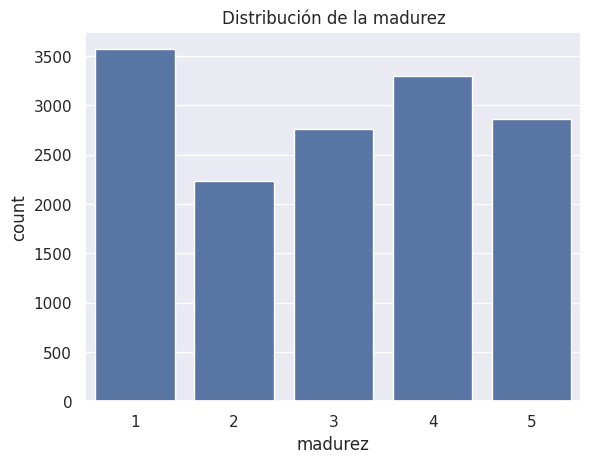

In [7]:
sns.countplot(x='madurez', data=df)
plt.title('Distribución de la madurez')
plt.show()


In [8]:
X = df[['R', 'G', 'B']]  # Características
y = df['madurez']    

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)  # Convierte las etiquetas a números
print(le.classes_)  # Muestra la correspondencia entre números y etiquetas


[1 2 3 4 5]


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Ajustar y transformar los datos de entrenamiento
X_test = scaler.transform(X_test)        # Transformar los datos de prueba


In [16]:
model = LogisticRegression(random_state=42, multi_class='multinomial', solver='newton-cg')
model.fit(X_train, y_train)


LogisticRegression(multi_class='multinomial', random_state=42,
                   solver='newton-cg')

Precisión del modelo: 0.6213460231135283


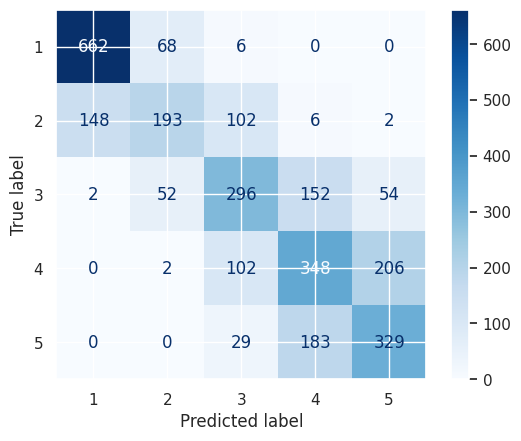

In [17]:
# Predicciones
y_pred = model.predict(X_test)

# Métricas de evaluación
print("Precisión del modelo:", accuracy_score(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.show()


In [19]:
nuevo_dato = np.array([[0.0627450980392157, 0.0588235294117647, 0.0627450980392157]])
nuevo_punto_escalado = scaler.transform(nuevo_dato)
prediccion = model.predict(nuevo_punto_escalado)

madurez_predicha = prediccion[0]

# Mapear de regreso a las categorías
categorias_inversas = {1: 'Adecuado', 2: 'CorrectoMaduro', 3: 'CorrectoVerde', 4: 'Maduro', 5: 'Verde'}
print(f"Madurez predicha: {categorias_inversas[madurez_predicha]}")

Madurez predicha: CorrectoVerde


/home/mauro/anaconda3/envs/servilla/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
